In [1]:
from pysces import *

In [2]:
x, L, n = symbols("x, L, n")

# Normalizing Particle in a Box

This can be done in one line, using the PIB() function, and the normalize_constant() function

For the PIB() function, there are three parameters:

    x: a variable.
    L: Length of the box.
    n: an integer.

This looks like:

PIB(x, L, n)

These variables do not change, unless given explicit values.

For the normalization_constant() function, there are four parameters:

        wavefunc: The WaveFunction/expression of interest
        lower: The lower bound of the integral. If bounds are not listed, this is -oo
        upper: The upper bound of the integral. If bounds are not listed, this is oo
        var1: What the integral is taken with respect to
        var2: What the second integral is taken with respect to
    
This looks like:

normalization_constant(WaveFunc, lower, upper, var1)

Note that since this is a one-dimensional box, only the first "var1" argument is used. We will see in a later example how to use both var1 and var2.

Since this is a Particle in a Box example, the lower bound is "0", and the upper bound is "L", the length of the box.


In [3]:
x, L, n = symbols("x, L, n")

normalization_constant(PIB(x, L, n), 0, L, x).replace(sin(2*pi*n), 0)

⎧√2       π⋅n    
⎪──   for ─── ≠ 0
⎨√L        L     
⎪                
⎩zoo   otherwise 

The above is a piecewise function. The top expression is what we are interested in, and is the NORMALIZATION CONSTANT for the given WaveFunction.

The value can then be multiplied by the original WaveFunction to yield the normalized Particle in a Box.

In [4]:
(sqrt(2/L))*PIB(x, L, n)

# Expectation Value of the Position Operator for Particle in a Box

We can also do a simple positional expectation value using the normalized Particle in a Box.

The normalized Particle in a Box, although we were able to compute it, is given by the function PIB_normalize() with the same parameters as the PIB() function.

The expectation_value() function calculates the expectation value for an operator of interest. In this example we are using the "x", or positional, operator.

The expectation_value() function has SIX positional arguments:

        wavefunc_1: The "bra" normalized WaveFunction
        operator: The operator of interest
        wavefunc_2: The "ket" normalized WaveFunction
        lower: The lower bound of the integral. If bounds are not listed, this is -oo
        upper: The upper bound of the integral. If bounds are not listed, this is oo
        var: What the integral is taken with respect to

This looks like:

expectation_value(wavefunc_1, operator, wavefunc_2, lower, upper, var)

Since this is a Particle in a Box example, the lower bound is "0", and the upper bound is "L", the length of the box.




In [5]:
expectation_value(PIB_normalized(x, L, n), x, PIB_normalized(x, L, n), 0, L, x)

⎧L                            
⎪─  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎨2                            
⎪                             
⎩0          otherwise         

The expectation value is the average value of an operator for a given WaveFunction between certain bounds. This quantity, L/2, for the positional operator, indicates the most likely location to find the particle in a 1-dimensional box at L/2, which is the center of the box.

# Expectation Value of the Kinetic Energy Operator for Particle in a Box

In [6]:
expectation_value(PIB_normalized(x, L, n), kinetic_energy(x), PIB_normalized(x, L, n), 0, L, x)

⎧ 2    2  2             
⎪π ⋅h_b ⋅n       π⋅n    
⎪──────────  for ─── ≠ 0
⎨     2           L     
⎪  2⋅L ⋅m               
⎪                       
⎩    0        otherwise 

# Graphing the WaveFunction of Particle in a Box

Again, we know that the PIB_normalized() function has the following parameters:

    x: a variable.
    L: Length of the box.
    n: an integer.

Let's take n = 1 , and L = 1

Note that L is the length of the box, and so it is easiest to observe when equal to 1

We can then use plot_function() , which has seven arguments:

        func: The function/Normalized WaveFunction of interest
        lower: The lower bound of the B domain (for Particle in a Box, 0)
        upper: The upper bound of the B domain (for Particle in a Box, 1)
        B: This is "x" usually (x-axis) - the domain
        lower2: The lower bound for the C range (for Particle in a Box, 0)
        upper2: The upper bound for the C range (for Particle in a Box, 1)
        C: This is "y" usually (y-axis) - the range
    

This looks like:

plot_function(func, lower1, upper1, B) since we are only plotting a one-dimensional particle in a box.

The following example is a ground state electron in a particle in a box.

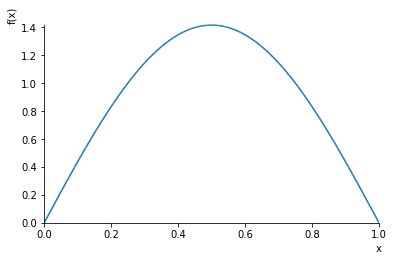

In [21]:
L = 1
n = 1

plot_function(PIB_normalized(x, L, n), 0, L, x)

Note: The WaveFunction will not print if the n and L arguments are not assigned numerical values.

L should be kept at L = 1, but the n argument can change to any integer.

Sometimes, the plot is not graphed when the cell is run. It normally has to be run twice to have the correct output.

We can now look at higher energy levels by increasing n, the principle quantum number. Using the expectation_value() function that we used before, we can also quantify the energy. 

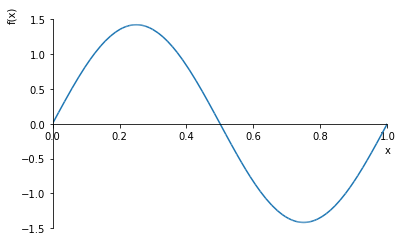

In [25]:
L = 1
n = 2

plot_function(PIB_normalized(x, L, n), 0, L, x)

In [9]:
L = Symbol("L")
n = Symbol("n")

expectation_value(PIB_normalized(x, L, 2), kinetic_energy(x), PIB_normalized(x, L, 2), 0, L, x)

⎧   2    2                            
⎪2⋅π ⋅h_b                             
⎪─────────  for L > -∞ ∧ L < ∞ ∧ L ≠ 0
⎨    2                                
⎪   L ⋅m                              
⎪                                     
⎩    0              otherwise         

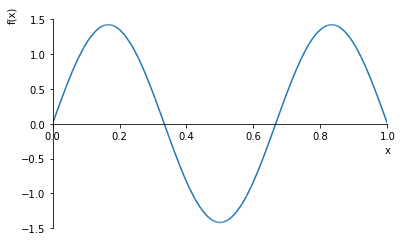

In [10]:
L = 1
n = 3

plot_function(PIB_normalized(x, 1, 3), 0, L, x)

In [11]:
L = Symbol("L")
n = Symbol("n")

expectation_value(PIB_normalized(x, L, 3), kinetic_energy(x), PIB_normalized(x, L, 3), 0, L, x)

⎧   2    2                            
⎪9⋅π ⋅h_b                             
⎪─────────  for L > -∞ ∧ L < ∞ ∧ L ≠ 0
⎨     2                               
⎪  2⋅L ⋅m                             
⎪                                     
⎩    0              otherwise         

# Normalzing 2-Dimensional Particle in a Box

Let's look at a particle in a square box with length L. We can use the pre-defined PIB_2D() function to calculate this, along with the normalization_constant() function used with the one-dimensional box.

For the PIB_2D() function, there are five parameters:

        x: a variable.
        y: a variable.
        L_x: Length of the box in the x direction
        L_y: Length of the box in the y direction
        n: an integer.

This looks like:

PIB(x, y, L_x, L_y, n)

These variables do not change, unless given explicit values.

For the normalization_constant() function, there are four parameters:

        wavefunc: The WaveFunction/expression of interest
        lower: The lower bound of the integral. If bounds are not listed, this is -oo
        upper: The upper bound of the integral. If bounds are not listed, this is oo
        var1: What the integral is taken with respect to
        var2: What the second integral is taken with respect to
    
This looks like:

normalize_constant(WaveFunc, lower, upper, var1, var2)

Since there are two dimensions, both var1 and var2 are used in this problem.

Since this is a Particle in a Box example, the lower bound is "0", and the upper bound is "L", the length of the box.

In [12]:
x, y, L_x, L_y = symbols("x, y, L_x, L_y")

normalization_constant(PIB_2D(x, y, L, L, n), 0, L, x, y)

⎧   2         π⋅n    
⎪───────  for ─── ≠ 0
⎪   ____       L     
⎨  ╱  2              
⎪╲╱  L               
⎪                    
⎩  zoo     otherwise 

This is the normalization constant. Once again, this needs to be multiplied by the original PIB_2D wave function.

In [13]:
(2/L)*PIB_2D(x, y, L, L, n)

# Graphing the WaveFunction of 2-D Particle in a Box

Again, we know that the PIB_2D_normalized() function has the following parameters:

        x: a variable.
        y: a variable.
        L_x: Length of the box in the x direction
        L_y: Length of the box in the y direction
        n: an integer.

Let's take n = 1 , and L = 1

Note that L is the length of the box, and so it is easiest to observe when equal to 1

We can then use plot_function() , which has seven arguments:

        func: The function/Normalized WaveFunction of interest
        lower: The lower bound of the B domain (for Particle in a Box, 0)
        upper: The upper bound of the B domain (for Particle in a Box, 1)
        B: This is "x" usually (x-axis) - the domain
        lower2: The lower bound for the C range (for Particle in a Box, 0)
        upper2: The upper bound for the C range (for Particle in a Box, 1)
        C: This is "y" usually (y-axis) - the range
    

This looks like:

plot_function(func, lower1, upper1, B, lower2, upper2, C) since we are now plotting a two-dimensional particle in a box.

The following example is a ground state electron in a 2-D particle in a box.

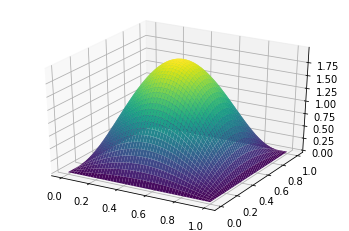

In [14]:
L = 1
n = 1

plot_function(PIB_2D_normalized(x, y, L, L, n), 0, L, x, 0, L, y)

We can also look at various excited state electrons, similar of that to the one dimensional box. 

Let's look at n = 2 and n = 3.

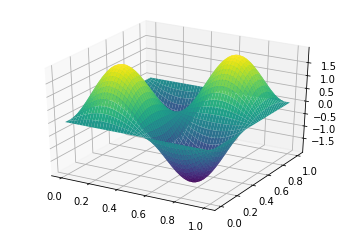

In [15]:
L = 1
n = 2

plot_function(PIB_2D_normalized(x, y, L, L, n), 0, L, x, 0, L, y)

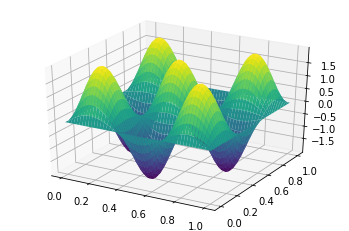

In [16]:
L = 1
n = 3

plot_function(PIB_2D_normalized(x, y, L, L, n), 0, L, x, 0, L, y)